<h2>Shushil Kumar Ravishankar</h2>
<h2>16BCE1259</h2>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,recall_score,precision_score,roc_curve,roc_auc_score
from sklearn.preprocessing import LabelEncoder
from sklearn.cross_validation import cross_val_score

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/cross_validation.py:41: DeprecationWarning: This module was deprecated in version 0.18 in favor of the model_selection module into which all the refactored classes and functions are moved. Also note that the interface of the new CV iterators are different from that of this module. This module will be removed in 0.20.
  "This module will be removed in 0.20.", DeprecationWarning)


In [2]:
data=pd.read_csv('clean_bmart.csv',sep=',')
data.head()

,Unnamed: 0,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Medium,Tier 3,Grocery Store,732.3800
4,4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
X=data.loc[(data['Outlet_Location_Type']=='Tier 1')|(data['Outlet_Location_Type']=='Tier 2')]
x=X.values[:,:]
y=X.values[:,10]
ley=LabelEncoder()
ley.fit(y)
y=ley.transform(y)
for i in [1,3,5,7,9,11]:
    en=LabelEncoder()
    en.fit(X.values[:,i])
    x[:,i]=en.transform(x[:,i])

x=x[:,[1,2,3,4,5,6,7,8,9,11,12]]
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.3,random_state=0)
print(y)
print(x)
print(data.columns.values[[4,8,10]])

[0 0 1 ... 1 1 0]
[[156 9.3 0 ... 0 1 3735.138]
 [659 17.5 0 ... 0 1 2097.27]
 [438 16.2 1 ... 0 1 1076.5986]
 ...
 [890 8.38 1 ... 0 1 549.285]
 [1348 10.6 0 ... 1 1 1193.1136]
 [50 14.8 0 ... 1 1 765.67]]
['Item_Visibility' 'Outlet_Establishment_Year' 'Outlet_Location_Type']


In [4]:
from sklearn.neural_network import MLPClassifier

In [5]:
mlp=MLPClassifier(hidden_layer_sizes=(5),max_iter=1000,random_state=0)

In [6]:
mlp.fit(X_train,y_train)

MLPClassifier(activation='relu', alpha=0.0001, batch_size='auto', beta_1=0.9,
       beta_2=0.999, early_stopping=False, epsilon=1e-08,
       hidden_layer_sizes=5, learning_rate='constant',
       learning_rate_init=0.001, max_iter=1000, momentum=0.9,
       nesterovs_momentum=True, power_t=0.5, random_state=0, shuffle=True,
       solver='adam', tol=0.0001, validation_fraction=0.1, verbose=False,
       warm_start=False)

In [7]:
predictions=mlp.predict(X_test)

In [8]:
print(" 0's in y_test:",(y_test==0).sum())
print(" 1's in y_test:",(y_test==1).sum())

 0's in y_test: 730
 1's in y_test: 822


<b>The number of transactions of each class are almost same i.e. the dataset is unbiased and doesn't require techniques like over-sampling or under-sampling to be applied before training a model. A dumb model cannot get a high accuracy score in this dataset by just predicting the class with highest frequency.</b>

In [9]:
y_test.shape[0]

1552

In [10]:
print("null accuracy:",max(((y_test==0).sum())/y_test.shape[0],((y_test==1).sum())/y_test.shape[0])*100)

null accuracy: 52.9639175257732


<b>This is the Null accuracy of the dataset i.e. it is the accuracy that a model can achieve while just predicting the majority class of this dataset. </b>

In [11]:
from sklearn.metrics import classification_report,confusion_matrix
confusion = confusion_matrix(y_test, predictions)
print(confusion)
#[row, column]
TP = confusion[1, 1]
TN = confusion[0, 0]
FP = confusion[0, 1]
FN = confusion[1, 0]

[[650  80]
 [218 604]]


604 transactions are correctly classified as '1'.  
650 transactions are correctly classified as '0'.  
80 transactions are wrongly classified as '1'.  
218 transactions are wrongly classified as '0'.  


In [12]:
print((TP + TN) / float(TP + TN + FP + FN))
print(accuracy_score(y_test, predictions))

0.8079896907216495
0.8079896907216495


<b>The Accuracy score of the model is high enough to show that there is actual learning taking place here and the model isn't just predicting the majority class.</b>

In [13]:
classification_error = (FP + FN) / float(TP + TN + FP + FN)

print(classification_error)
print(1 - accuracy_score(y_test, predictions))

0.19201030927835053
0.1920103092783505


In [14]:
sensitivity = TP / float(FN + TP)

print(sensitivity)
print(recall_score(y_test, predictions))

0.7347931873479319
0.7347931873479319


In [15]:
specificity = TN / (TN + FP)

print(specificity)

0.8904109589041096


In [16]:
false_positive_rate = FP / float(TN + FP)

print(false_positive_rate)
print(1 - specificity)

0.1095890410958904
0.1095890410958904


In [17]:
precision = TP / float(TP + FP)

print(precision)
print(precision_score(y_test, predictions))

0.8830409356725146
0.8830409356725146


<b>The above model has a good sensitivity i.e. it very oftenly predicts '1' for transaction with value '1' instead as '0'.  
The model has a very good specificity i.e. it mostly predicts a transaction with value '0' as '0' instrad of '1' in other words, it has a low False Positive Rate but has a high False Negative Rate, which means that the model has higher probability of wrongly classifying a transaction with value '1' as '0' than predicting a transaction with value '0' as '1'.  
The model is highly precise i.e. of the 1's predicticted by the model, most of them are actually 1. </b> 

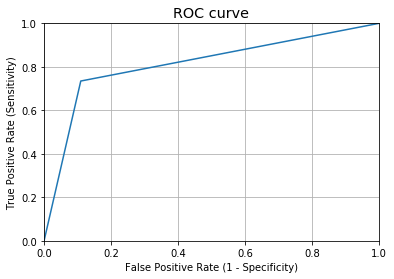

In [18]:
fpr, tpr, thresholds = roc_curve(y_test, predictions)

plt.plot(fpr, tpr)
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.0])
plt.rcParams['font.size'] = 12
plt.title('ROC curve')
plt.xlabel('False Positive Rate (1 - Specificity)')
plt.ylabel('True Positive Rate (Sensitivity)')
plt.grid(True)

In [19]:
print(roc_auc_score(y_test, predictions))

0.8126020731260207


<b>AUC ROC indicates how well the probabilities from the positive classes are separated from the negative classes.

The area under the ROC curve is high. It indicates that the distributions of positives and negatives are well separated for the model.
It means that the model is very well able to differentiate between the two classes, indicating it to be good model.</b>

In [20]:
cross_val_score(mlp, x, y, cv=10, scoring='roc_auc').mean()

0.9374891828808163

<b>In the basic approach, called k-fold CV, the training set is split into k smaller sets (other approaches are described below, but generally follow the same principles). The following procedure is followed for each of the k “folds”:

1) A model is trained using k-1 of the folds as training data;  
2) the resulting model is validated on the remaining part of the data (i.e., it is used as a test set to compute a performance measure such as accuracy).  


The performance measure reported by k-fold cross-validation is then the average of the values computed in the loop. This approach can be computationally expensive, but is very useful when the number of samples are very less.

Here we use Area Under the ROC as the scoring parameter and cv=10 i.e. we divide the testset in 10 parts, use 9 for training and the remaining 1 as validation-set and then the area under the ROC is measured. This process is repeated 10 times with each part being validation-set 1 time.

The high Cross validation score indicates that the given model has a very good performance</b>